In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

In [2]:
# import data frame 
merged_df = pd.read_csv("https://raw.githubusercontent.com/r41ss4/rennes_da/refs/heads/main/data/merged/merged_df.csv")

In [3]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311904 entries, 0 to 311903
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           311904 non-null  object 
 1   source_city       311904 non-null  object 
 2   destination_city  311904 non-null  object 
 3   departure_time    311904 non-null  object 
 4   arrival_time      311904 non-null  object 
 5   duration          311904 non-null  float64
 6   specific_stops    311904 non-null  object 
 7   add_info          311904 non-null  object 
 8   price             311904 non-null  int64  
 9   general_stops     311904 non-null  object 
 10  class             311904 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 26.2+ MB


In [4]:
merged_df

,airline,source_city,destination_city,departure_time,arrival_time,duration,specific_stops,add_info,price,general_stops,class
0,IndiGo,Banglore,New Delhi,Evening,Early_Morning,2.50,non-stop,No info,3897,zero,No info
1,Airline,Kolkata,Banglore,Early_Morning,Afternoon,7.25,2 stops,No info,7662,two_or_more,No info
2,Jet Airways,Delhi,Cochin,Morning,Early_Morning,19.00,2 stops,No info,13882,two_or_more,No info
3,IndiGo,Kolkata,Banglore,Evening,Evening,5.25,1 stop,No info,6218,one,No info
4,IndiGo,Banglore,New Delhi,Afternoon,Evening,4.45,1 stop,No info,13302,one,No info
...,...,...,...,...,...,...,...,...,...,...,...
311899,Vistara,Chennai,Hyderabad,Morning,Evening,10.08,1 stop,No info,69265,one,Business
311900,Vistara,Chennai,Hyderabad,Afternoon,Night,10.42,1 stop,No info,77105,one,Business
311901,Vistara,Chennai,Hyderabad,Early_Morning,Night,13.83,1 stop,No info,79099,one,Business
311902,Vistara,Chennai,Hyderabad,Early_Morning,Evening,10.00,1 stop,No info,81585,one,Business


# Diagnosis analysis

# Correlation

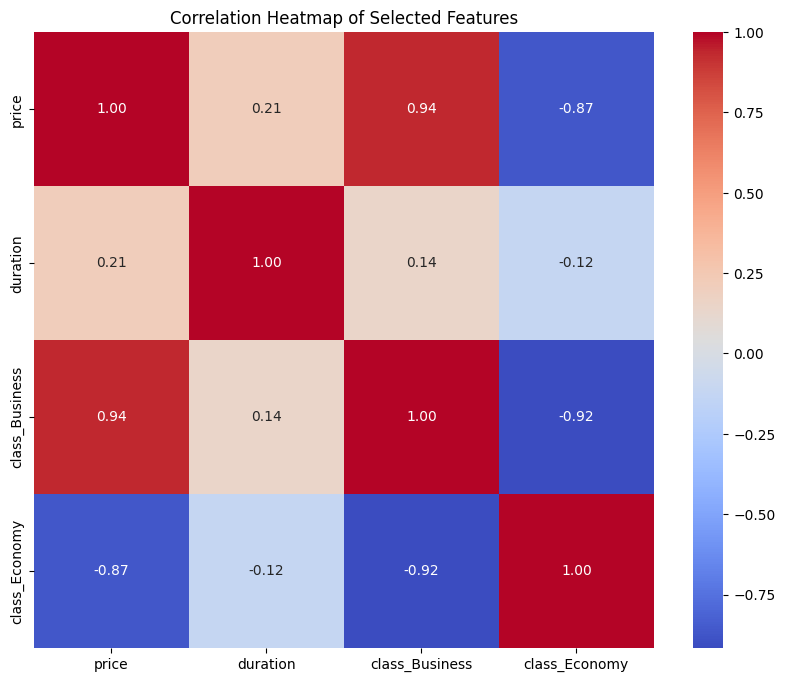

In [5]:
if 'class' not in merged_df.columns:
    raise KeyError("The 'class' column is not available in the dataset.")

# create columns 'class_Business' 和 'class_Economy'
merged_df['class_Business'] = (merged_df['class'] == 'Business').astype(int)
merged_df['class_Economy'] = (merged_df['class'] == 'Economy').astype(int)

# correlation analysis
columns_of_interest = ['price', 'duration', 'class_Business', 'class_Economy']

# ensure all columns are in the dataset
missing_columns = [col for col in columns_of_interest if col not in merged_df.columns]
if missing_columns:
    raise KeyError(f"The following columns are missing from the dataset: {missing_columns}")

# correlation matrix
correlation_matrix = merged_df[columns_of_interest].corr()

# draw the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Selected Features")
plt.show()


# Explanation
Factors influencing ticket prices:

1. Business class has the strongest positive correlation with price (price). 
2. Economy class shows a strong negative correlation, indicating distinct pricing models. 
3. Flight duration has minimal impact on price and cabin selection, with weak correlations overall.

In [6]:
import pandas as pd
import statsmodels.api as sm

# Create binary columns for 'class_Business' and 'class_Economy'
merged_df['class_Business'] = (merged_df['class'] == 'Business').astype(int)
merged_df['class_Economy'] = (merged_df['class'] == 'Economy').astype(int)

# Define the target variable (Y) and independent variables (X)
X = merged_df[['duration', 'class_Business', 'class_Economy']]
y = merged_df['price']

# Add a constant term for regression analysis
X = sm.add_constant(X)

# Perform linear regression analysis
model = sm.OLS(y, X).fit()

# Display the regression results summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 8.033e+05
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        11:11:33   Log-Likelihood:            -3.2290e+06
No. Observations:              311904   AIC:                         6.458e+06
Df Residuals:                  311900   BIC:                         6.458e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           6526.3015     72.752     89.

# Explaination

This OLS regression shows that the dependent variable is price, with an R-squared value of 0.855, indicating that 85.5% of the price variation is explained by the independent variables. Key results include:

1. Cabin class is the primary factor influencing ticket prices, with business class having the greatest impact,
2. followed by flight distance,
3. while economy class offers a more affordable option.

# Root Cause Analysis

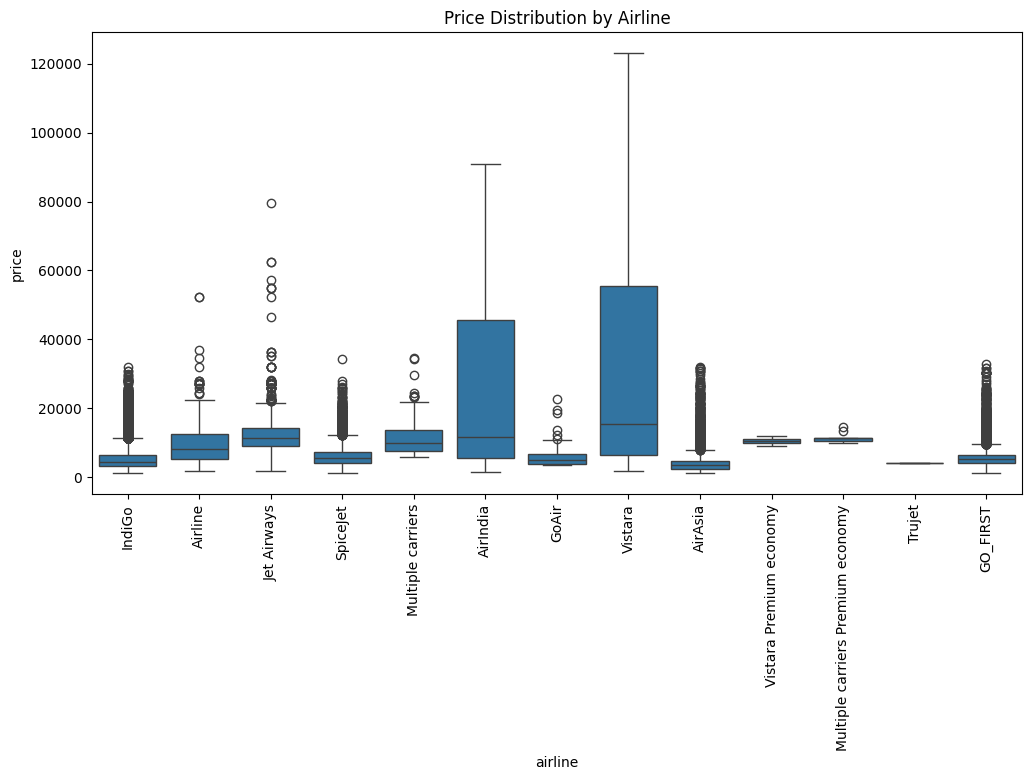

Price Anomalies by Airline:
         count           mean         std      min      25%       50%  \
airline                                                                 
Vistara  204.0  101672.794118  5211.45823  95657.0  97681.0  100341.5   

              75%       max  
airline                      
Vistara  104466.0  123071.0  

Duration Anomalies by Airline:
              count       mean       std    min    25%   50%      75%    max
airline                                                                     
AirIndia     1287.0  34.049946  2.867808  30.45  31.58  33.5  35.7500  49.83
Airline        16.0  35.556250  2.130327  30.55  34.00  36.1  37.2125  38.15
Jet Airways    45.0  35.804444  3.732806  30.45  33.15  34.3  38.1500  47.40
Vistara       740.0  32.542108  1.884511  30.58  31.08  32.0  33.7500  47.08

Price Anomalies by Stops and Departure Time:
                               count           mean          std      min  \
specific_stops departure_time                

In [7]:
# Step 1: Detect anomalies in price and duration
# Identify outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

price_outliers = detect_outliers(merged_df, 'price')
duration_outliers = detect_outliers(merged_df, 'duration')

# Step 2: Drill down by dimensions
# Group by airline and calculate statistics
price_anomalies_by_airline = price_outliers.groupby('airline')['price'].describe()
duration_anomalies_by_airline = duration_outliers.groupby('airline')['duration'].describe()

# Step 3: Visualize anomalies
# Boxplot for price by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='airline', y='price', data=merged_df)
plt.title('Price Distribution by Airline')
plt.xticks(rotation=90)
plt.show()

# Step 3: Drill down further into specific stops and departure time
price_anomalies_by_stops = price_outliers.groupby(['specific_stops', 'departure_time'])['price'].describe()
duration_anomalies_by_stops = duration_outliers.groupby(['specific_stops', 'departure_time'])['duration'].describe()

# Display drill-down statistics for anomalies
print("Price Anomalies by Airline:")
print(price_anomalies_by_airline)

print("\nDuration Anomalies by Airline:")
print(duration_anomalies_by_airline)

print("\nPrice Anomalies by Stops and Departure Time:")
print(price_anomalies_by_stops)

print("\nDuration Anomalies by Stops and Departure Time:")
print(duration_anomalies_by_stops)


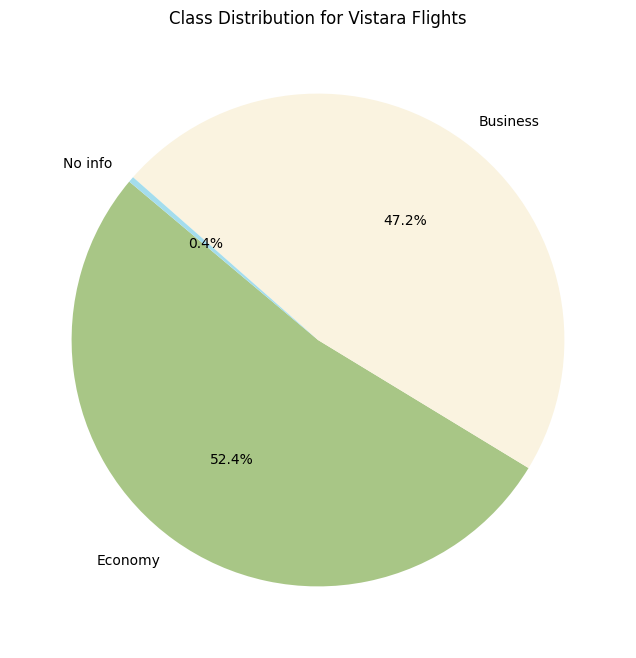

In [8]:
# Filter data for Vistara flights
vistara_data = merged_df[merged_df['airline'] == 'Vistara']

# Check if the 'class' column exists in the dataset
if 'class' in vistara_data.columns:
    # Count the number of flights in each class for Vistara
    class_counts = vistara_data['class'].value_counts()

    # Plot a pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, 
            colors=['#A8C686', '#FAF3E0', '#A4DDED', '#F6C6EA'])
    plt.title("Class Distribution for Vistara Flights")
    plt.show()
else:
    print("The 'class' column is not available in the dataset.")


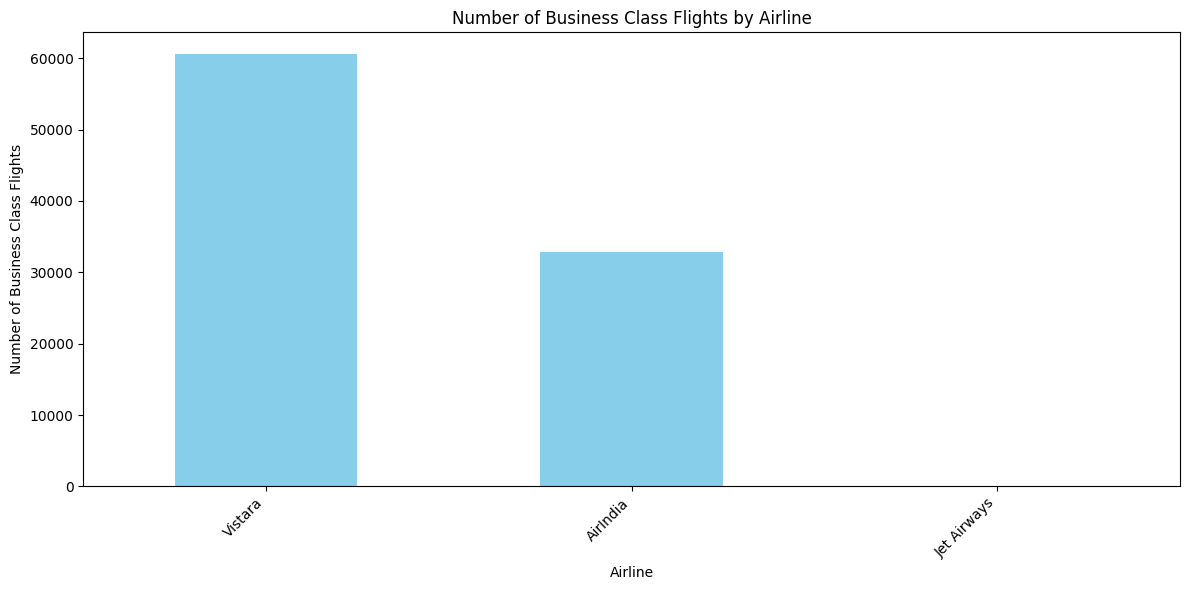

In [9]:
# Check if the 'class' column exists in the dataset
if 'class' in merged_df.columns:
    # Filter for Business class and group by airline
    business_class_counts = merged_df[merged_df['class'] == 'Business'].groupby('airline').size()

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    business_class_counts.sort_values(ascending=False).plot(kind='bar', color='skyblue')
    plt.title("Number of Business Class Flights by Airline")
    plt.xlabel("Airline")
    plt.ylabel("Number of Business Class Flights")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("The 'class' column is not available in the dataset.")


In [10]:
from scipy.stats import ttest_ind

# Filter data for Vistara
vistara_data = merged_df[merged_df['airline'] == 'Vistara']

# Check if the 'class' column exists in the dataset
if 'class' in vistara_data.columns:
    # Separate data into two groups: Business and Economy
    business_prices = vistara_data[vistara_data['class'] == 'Business']['price'].dropna()
    economy_prices = vistara_data[vistara_data['class'] == 'Economy']['price'].dropna()

    # Perform t-test
    t_stat, p_value = ttest_ind(business_prices, economy_prices, equal_var=False)

    # Output the results
    print("T-test Results:")
    print(f"T-statistic: {t_stat:.4f}")
    print(f"P-value: {p_value:.4e}")

    if p_value < 0.05:
        print("Conclusion: There is a significant difference in ticket prices between Business and Economy classes for Vistara.")
    else:
        print("Conclusion: There is no significant difference in ticket prices between Business and Economy classes for Vistara.")
else:
    print("The 'class' column is not available in the dataset.")


T-test Results:
T-statistic: 855.1197
P-value: 0.0000e+00
Conclusion: There is a significant difference in ticket prices between Business and Economy classes for Vistara.


# Perform t-tests for the relationship between price and other variables in the dataset:

In [11]:
from scipy.stats import ttest_ind

# Prepare a dictionary to store results
t_test_results = {}

# Iterate through categorical variables
categorical_columns = ['airline', 'source_city', 'destination_city', 'specific_stops', 'general_stops', 'departure_time', 'arrival_time']

for col in categorical_columns:
    if merged_df[col].nunique() > 1:  # Ensure the column has more than one unique value
        # Perform t-test between the two largest groups in the column
        top_groups = merged_df[col].value_counts().index[:2]
        group1 = merged_df[merged_df[col] == top_groups[0]]['price']
        group2 = merged_df[merged_df[col] == top_groups[1]]['price']
        
        # Perform t-test
        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
        
        # Store the results
        t_test_results[col] = {
            'Group 1': top_groups[0],
            'Group 2': top_groups[1],
            'T-Statistic': t_stat,
            'P-Value': p_value
        }

# Convert the results into a DataFrame for better visualization
t_test_results_df = pd.DataFrame(t_test_results).T

t_test_results_df

,Group 1,Group 2,T-Statistic,P-Value
airline,Vistara,AirIndia,69.810678,0.0
source_city,Delhi,Mumbai,-24.181792,0.0
destination_city,Mumbai,Delhi,25.45103,0.0
specific_stops,1 stop,non-stop,199.745942,0.0
general_stops,one,zero,199.745942,0.0
departure_time,Morning,Evening,1.360619,0.173636
arrival_time,Night,Evening,-6.150517,0.0


# Explanation
1. Ticket prices are influenced by the choice of airline, route, and the number of stops.
2. Departure time does not show a significant impact, but arrival time does.